# 🚨🚨 Topological sorting and longest path algorithm is badly implemented.

👉 **See `July 9 Notebook`.**

# Graph Representation in data structure

# For unweighted directed graph

## Adjacency matrix representation:

In [1]:
import numpy as np

In [2]:
0  # int
0.  # float
0 == 0.

0

0.0

True

In [3]:
[[0.]]

[[0.0]]

In [4]:
np.zeros(shape=(5, 5))  # shape=(rows, cols)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [5]:
V = [0, 1, 2, 3, 4]
E = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]

### Using NumPy 2d array

In [6]:
size = len(V)
adjacency_matrix = np.zeros(shape=(size, size))  # skeleton [using numpy array]

for (i, j) in E:
  adjacency_matrix[i, j] = 1

adjacency_matrix

array([[0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

### Using Python nested list

In [7]:
size = len(V)
adjacency_matrix = [[0 for j in range(size)] for i in range(size)]  # skeleton [using py 2d list]

for (i, j) in E:
  adjacency_matrix[i][j] = 1

adjacency_matrix

[[0, 1, 1, 0, 0],
 [0, 0, 0, 1, 1],
 [0, 0, 0, 1, 1],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0]]

## Adjacency list representation:

In [8]:
V = [0, 1, 2, 3, 4]
E = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]

In [9]:
adjacency_list = {}
size = len(V)

for i in range(size):
  adjacency_list[i] = []

for (i, j) in E:
  adjacency_list[i].append(j)

adjacency_list

{0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}

# For unweighted undirected graph

In [10]:
V = [0, 1, 2, 3, 4]
E = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]  # original edges
UE = E + [(j, i) for (i, j) in E]  # original + reversed (UE: undirected edges)

In [11]:
E  # original edges
[(j, i) for (i, j) in E]  # reversed edges

print(E + [(j, i) for (i, j) in E])  # original + reversed

[(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]

[(1, 0), (2, 0), (3, 1), (4, 1), (4, 2), (3, 2), (4, 3)]

[(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4), (1, 0), (2, 0), (3, 1), (4, 1), (4, 2), (3, 2), (4, 3)]


In [12]:
adjacency_list = {}
size = len(V)

for i in range(size):
  adjacency_list[i] = []
for (i, j) in UE:
  adjacency_list[i].append(j)

adjacency_list

{0: [1, 2], 1: [3, 4, 0], 2: [4, 3, 0], 3: [4, 1, 2], 4: [1, 2, 3]}

In [13]:
size = len(V)
adjacency_matrix = np.zeros(shape=(size, size))

for (i, j) in UE:
  adjacency_matrix[i, j] = 1

adjacency_matrix

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 1.],
       [1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 1.],
       [0., 1., 1., 1., 0.]])

In [14]:
size = len(V)
adjacency_matrix = [[0 for j in range(size)] for i in range(size)]  # skeleton

for (i, j) in UE:
  adjacency_matrix[i][j] = 1

adjacency_matrix

[[0, 1, 1, 0, 0],
 [1, 0, 0, 1, 1],
 [1, 0, 0, 1, 1],
 [0, 1, 1, 0, 1],
 [0, 1, 1, 1, 0]]

# Breadth First Search(BFS) 

In [15]:
class Queue:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def enqueue(self, value):
    self.data.append(value)

  def dequeue(self):
    if self.is_empty():
      raise Exception('queue is empty')
    return self.data.pop(0)

  def __str__(self):
    return str(self.data)


queue = Queue()
queue.enqueue(10)
queue.enqueue(20)
queue.enqueue(30)

print(queue.dequeue())
print(queue.dequeue())
queue.enqueue(40)
print(queue.dequeue())
print(queue.dequeue())
print(queue)

10
20
30
40
[]


## Implementation BFS for adjacency list

In [16]:
def bfs_adjacency_list(adjacency_list, start_vertex):
  visited = {}
  for vertex in adjacency_list:
    visited[vertex] = False
  # print(f'{visited=}')

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    neighbors = adjacency_list[curr_vertex]
    for adj_vertex in neighbors:
      if visited[adj_vertex]:
        continue
      queue.enqueue(adj_vertex)
      visited[adj_vertex] = True

  return visited


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs_adjacency_list(adjacency_list, 0)

{0: True, 1: True, 2: True, 3: True, 4: True}

## Implementation BFS for adjacency matrix

In [17]:
V = [0, 1, 2, 3, 4]
E = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]
size = len(V)
adjacency_matrix = np.zeros(shape=(size, size))

for (i, j) in E:
  adjacency_matrix[i, j] = 1

# rows, cols = adjacency_matrix.shape
# print(rows, cols)
adjacency_matrix

array([[0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [18]:
def get_neighbors(adjacency_matrix, vertex):
  neighbors = []
  rows, cols = adjacency_matrix.shape
  for j in range(cols):
    if adjacency_matrix[vertex, j] == 1:
      neighbors.append(j)
  return neighbors


get_neighbors(adjacency_matrix, 0)

[1, 2]

In [19]:
def bfs_adjacency_matrix(adjacency_matrix, start_vertex):
  visited = {}
  rows, cols = adjacency_matrix.shape
  for i in range(rows):
    visited[i] = False
  # print(f'{visited=}')

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    neighbors = get_neighbors(adjacency_matrix, curr_vertex)
    for adj_vertex in neighbors:
      if visited[adj_vertex]:
        continue
      queue.enqueue(adj_vertex)
      visited[adj_vertex] = True

  return visited


bfs_adjacency_matrix(adjacency_matrix, 0)

{0: True, 1: True, 2: True, 3: True, 4: True}

## Find [traversal order] using BFS

In [20]:
def bfs_traversal_order(adjacency_list, start_vertex):
  visited = {}
  for vertex in adjacency_list:
    visited[vertex] = False

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True
  traversal_order = [start_vertex]

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    neighbors = adjacency_list[curr_vertex]
    for adj_vertex in neighbors:
      if visited[adj_vertex]:
        continue
      queue.enqueue(adj_vertex)
      visited[adj_vertex] = True
      traversal_order.append(adj_vertex)
      # print(f'{adj_vertex=}')

  return (visited, traversal_order)


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs_traversal_order(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 1, 2, 3, 4])

## Find parent of each vertex using BFS

In [21]:
def bfs_parent(adjacency_list, start_vertex):
  visited = {}
  parent = {}
  for vertex in adjacency_list:
    visited[vertex] = False
    parent[vertex] = -1
  # print(f'{visited=}, {parent=}')

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    neighbors = adjacency_list[curr_vertex]
    for adj_vertex in neighbors:
      if visited[adj_vertex]:
        continue
      queue.enqueue(adj_vertex)
      visited[adj_vertex] = True
      parent[adj_vertex] = curr_vertex
      # print(f'{adj_vertex=}, {curr_vertex=}')

  return (visited, parent)


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs_parent(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True},
 {0: -1, 1: 0, 2: 0, 3: 1, 4: 1})

## Find level number of vertices using BFS

In [22]:
def bfs_level(adjacency_list, start_vertex):
  parent = {}
  level = {}
  for vertex in adjacency_list:
    parent[vertex] = -1
    level[vertex] = -1

  queue = Queue()
  queue.enqueue(start_vertex)
  level[start_vertex] = 0

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    neighbors = adjacency_list[curr_vertex]
    for adj_vertex in neighbors:
      if level[adj_vertex] == -1:
        queue.enqueue(adj_vertex)
        parent[adj_vertex] = curr_vertex
        level[adj_vertex] = level[curr_vertex]+1

  return (parent, level)


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs_level(adjacency_list, 0)

({0: -1, 1: 0, 2: 0, 3: 1, 4: 1}, {0: 0, 1: 1, 2: 1, 3: 2, 4: 2})

# Depth First Search(DFS)

## Implementation of DFS for adjacency list

### DFS for adjacency list [using Stack]

In [23]:
class Stack:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def push(self, value):
    self.data.append(value)

  def pop(self):
    if self.is_empty():
      raise Exception('stack is empty')
    return self.data.pop()

  def __str__(self):
    return str(self.data)


stack = Stack()
stack.push(10)
stack.push(20)
stack.push(30)

print(stack.pop())
print(stack.pop())
stack.push(40)
print(stack.pop())
print(stack)

30
20
40
[10]


In [24]:
# if num is even -> print its square, if odd then do nothing
def print_even_squares(num):
  if num % 2 == 1:  # check stop condition [early return]
    return
  print(num ** 2)

  # if num % 2 == 0:  # check ok condition
  #   print(num ** 2)


print_even_squares(11)

In [25]:
# if not visited[curr_vertex]: # check ok condition ✅
#     all safe here (inside `if`) ✌️
#     visited[curr_vertex] = True
#     do step 1
#     do step 2

# if visited[curr_vertex]: # check stop condition ⚠️
#     continue # early return, avoid danger 🤗
# all safe here (outside `if`) ✌️
# visited[curr_vertex] = True
# do step 1
# do step 2

In [26]:
def dfs_adjacency_list(adjacency_list, start_vertex):
  visited = {}
  for vertex in adjacency_list:
    visited[vertex] = False
  # print(f'{visited=}')

  stack = Stack()
  stack.push(start_vertex)

  while not stack.is_empty():
    curr_vertex = stack.pop()  # u
    if visited[curr_vertex]:  # check stop condition ⚠️
      continue  # early return, avoid danger 🤗
    visited[curr_vertex] = True

    neighbors = adjacency_list[curr_vertex]
    for adj_vertex in neighbors:  # v
      if not visited[adj_vertex]:
        stack.push(adj_vertex)

  return visited


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs_adjacency_list(adjacency_list, 0)

{0: True, 1: True, 2: True, 3: True, 4: True}

### DFS for adjacency list [recursive, without stack]

In [27]:
def init_dfs_recursive(adjacency_list):
  visited = {}
  for vertex in adjacency_list:
    visited[vertex] = False
  return visited

In [28]:
# using global variable `visited`

def dfs_adjacency_list_recursive(adjacency_list, curr_vertex):
  visited[curr_vertex] = True  # `visited` is defined outside this function

  neighbors = adjacency_list[curr_vertex]
  for adj_vertex in neighbors:
    if not visited[adj_vertex]:
      dfs_adjacency_list_recursive(adjacency_list, adj_vertex)


# test code
adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
visited = init_dfs_recursive(adjacency_list)  # `visited` is defined here
dfs_adjacency_list_recursive(adjacency_list, 0)  # no `visited` parameter
print(visited)  # we print `visited` after recursion finishes

{0: True, 1: True, 2: True, 3: True, 4: True}


In [29]:
# using `visited` parameter, NOT using global variable

def dfs_adjacency_list_recursive(adjacency_list, curr_vertex, visited):
  visited[curr_vertex] = True  # `visited` is taken as a parameter

  neighbors = adjacency_list[curr_vertex]
  for adj_vertex in neighbors:
    if not visited[adj_vertex]:
      visited = dfs_adjacency_list_recursive(adjacency_list, adj_vertex, visited)
  return visited


# test code
adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
visited = init_dfs_recursive(adjacency_list)  # `visited` is defined here
dfs_adjacency_list_recursive(adjacency_list, 0, visited)  # we give `visited` parameter

{0: True, 1: True, 2: True, 3: True, 4: True}

## Implementation of DFS for adjacency matrix

### DFS for adjacency matrix [using Stack]

In [30]:
def dfs_adjacency_matrix(adjacency_matrix, start_vertex):
  pass


dfs_adjacency_matrix(adjacency_matrix, 0)

# Find Connected Components in graph using BFS

In [31]:
def bfs_adjacency_list(adjacency_list, start_vertex):
  visited = {}
  for vertex in adjacency_list:
    visited[vertex] = False

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    neighbors = adjacency_list[curr_vertex]
    for adj_vertex in neighbors:
      if not visited[adj_vertex]:
        queue.enqueue(adj_vertex)
        visited[adj_vertex] = True
  return visited


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs_adjacency_list(adjacency_list, 0)

{0: True, 1: True, 2: True, 3: True, 4: True}

In [32]:
def find_connected_components(adjacency_list):
  component = {}
  for vertex in adjacency_list:
    component[vertex] = -1

  component_id = 0

  for start_vertex in adjacency_list:
    if component[start_vertex] == -1:
      visited = bfs_adjacency_list(adjacency_list, start_vertex)
      # print(f'{start_vertex=}, {visited=}')
      for vertex in visited:
        if visited[vertex]:
          component[vertex] = component_id
      component_id += 1

  return component


adjacency_list = {0: [1], 1: [2], 2: [0], 3: [4, 6], 4: [3, 7], 5: [3, 7], 6: [5], 7: [4, 8], 8: [5, 9], 9: [8]}
find_connected_components(adjacency_list)

{0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}

# Pre and Post numbering using DFS

In [33]:
adjacency_list = {
    0: [1, 4], 1: [0], 2: [], 3: [], 4: [0, 8, 9], 5: [], 6: [], 7: [], 8: [4, 9], 9: [8, 4]
}

In [34]:
def init_dfs_recursive(adjacency_list):
  visited, pre, post = {}, {}, {}
  for vertex in adjacency_list:
    visited[vertex] = False
    pre[vertex], post[vertex] = -1, -1
  return (visited, pre, post)

In [35]:
def pre_post_numbering(adjacency_list, curr_vertex, count):
  visited[curr_vertex] = True

  pre[curr_vertex] = count  # entering the vertex
  count += 1

  neighbors = adjacency_list[curr_vertex]
  for adj_vertex in neighbors:
    if not visited[adj_vertex]:
      count = pre_post_numbering(adjacency_list, adj_vertex, count)

  post[curr_vertex] = count  # leaving the vertex
  count += 1

  return count


visited, pre, post = init_dfs_recursive(adjacency_list)
pre_post_numbering(adjacency_list, 0, 0)
print(visited)
print(pre)
print(post)

10

{0: True, 1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: False, 8: True, 9: True}
{0: 0, 1: 1, 2: -1, 3: -1, 4: 3, 5: -1, 6: -1, 7: -1, 8: 4, 9: 5}
{0: 9, 1: 2, 2: -1, 3: -1, 4: 8, 5: -1, 6: -1, 7: -1, 8: 7, 9: 6}


In [36]:
for vertex in adjacency_list:
  print(f'{vertex}: ({pre[vertex]}, {post[vertex]})')

0: (0, 9)
1: (1, 2)
2: (-1, -1)
3: (-1, -1)
4: (3, 8)
5: (-1, -1)
6: (-1, -1)
7: (-1, -1)
8: (4, 7)
9: (5, 6)


In [37]:
def check_edge(u, v):
  # forward edge, if interval [pre(u), post(u)] contains [pre(v), post(v)]
  # e.g., u=[1, 10], v=[3, 5]
  if pre[u] <= pre[v] and post[u] >= post[v]:
    return 'forward edge'

  # back edge, if interval [pre(v), post(v)] contains [pre(u), post(u)]
  # e.g., u=[3, 5], v=[1, 10]
  if pre[v] <= pre[u] and post[v] >= post[u]:
    return 'back edge'

  # cross edge, if intervals [pre(u), post(u)] and [pre(v), post(v)] are disjoint
  # e.g., u=[1, 2], v=[3, 4]
  # e.g., u=[7, 9], v=[2, 5]
  if post[u] < pre[v] or post[v] < pre[u]:
    return 'cross edge'


print(check_edge(4, 8))

forward edge


# DAG Topological Sort

In [38]:
def dag_topological_sort(adjacency_list):
  # initialize in-degree dictionary with all vertices at 0
  in_degree = {}
  for vertex in adjacency_list:
    in_degree[vertex] = 0

  # calculate in-degrees
  for neighbors in adjacency_list.values():
    for adj_vertex in neighbors:
      in_degree[adj_vertex] += 1

  # initialize queue with vertices having in-degree 0
  queue = Queue()
  for vertex in adjacency_list:
    if in_degree[vertex] == 0:
      queue.enqueue(vertex)

  # list to store sorted order
  sorted_list = []

  while not queue.is_empty():
    # dequeue a vertex with in-degree 0
    curr_vertex = queue.dequeue()
    sorted_list.append(curr_vertex)

    # reduce in-degree of current vertex's neighbors
    neighbors = adjacency_list[curr_vertex]
    for adj_vertex in neighbors:
      in_degree[adj_vertex] -= 1

      # enqueue neighbors with in-degree 0
      if in_degree[adj_vertex] == 0:
        queue.enqueue(adj_vertex)

  return sorted_list


adjacency_list = {0: [2, 3, 4], 1: [2, 7], 2: [5], 3: [5, 7], 4: [7], 5: [6], 6: [7], 7: []}
dag_topological_sort(adjacency_list) == [0, 1, 3, 4, 2, 5, 6, 7]

True

# DAG Longest path

In [39]:
def dag_longest_path(adjacency_list):
  # initialize in-degree and longest path dictionaries
  in_degree, longest_path = {}, {}
  for vertex in adjacency_list:
    in_degree[vertex], longest_path[vertex] = 0, 0

  # calculate in-degrees
  for neighbors in adjacency_list.values():
    for adj_vertex in neighbors:
      in_degree[adj_vertex] += 1
  # print(f'{in_degree=}, {longest_path=}')

  # initialize queue with vertices having in-degree 0
  queue = Queue()
  for vertex in adjacency_list:
    if in_degree[vertex] == 0:
      queue.enqueue(vertex)

  while not queue.is_empty():
    # dequeue a vertex with in-degree 0
    curr_vertex = queue.dequeue()
    in_degree[curr_vertex] -= 1

    # update longest path and reduce in-degree of neighbors
    neighbors = adjacency_list[curr_vertex]
    for adj_vertex in neighbors:
      in_degree[adj_vertex] -= 1
      longest_path[adj_vertex] = max(longest_path[adj_vertex], longest_path[curr_vertex]+1)
      # enqueue neighbors with in-degree 0
      if in_degree[adj_vertex] == 0:
        queue.enqueue(adj_vertex)

  return longest_path


adjacency_list = {0: [2, 3, 4], 1: [2, 7], 2: [5], 3: [5, 7], 4: [7], 5: [6], 6: [7], 7: []}
dag_longest_path(adjacency_list)  # == {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 3, 7: 4}

{0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 3, 7: 4}

# Not so optimal code above 👆⚠️⚠️

# July 9 🍃🌿🤗👇

**All the stuff down here is moved [on July 26] from `July 9 notebook` for cleanup purpose**

# printing all the names

In [40]:
names = ['vidhatri', 'rahul', 'muskan', 'vaishnvi', 'harikesh']

In [41]:
# printing all the names (just print the values at indices 0-4)
print(names[0])
print(names[1])
print(names[2])
print(names[3])
print(names[4])

vidhatri
rahul
muskan
vaishnvi
harikesh


In [42]:
# printing all the names (this wont work, why?)
i = 0
print(i, names[i])

print(i, names[i])

print(i, names[i])

print(i, names[i])

print(i, names[i])

0 vidhatri
0 vidhatri
0 vidhatri
0 vidhatri
0 vidhatri


In [43]:
# printing all the names (this works perfectly)
i = 0
print(i, names[i])

i = 1
print(i, names[i])

i = 2
print(i, names[i])

i = 3
print(i, names[i])

i = 4
print(i, names[i])

0 vidhatri
1 rahul
2 muskan
3 vaishnvi
4 harikesh


In [44]:
# printing all the names (doing the same thing in a loop)
for i in range(5):
  print(i)  # index
  print(names[i])  # value at index

0
vidhatri
1
rahul
2
muskan
3
vaishnvi
4
harikesh


# range function

In [45]:
# range function is used to create an an integer range
range(5)
list(range(5))

range(0, 5)

[0, 1, 2, 3, 4]

In [46]:
# using range function to loop over indices of a list
# do you know the exact length?

range(5)  # length is hard coded
range(len(names))  # length is calculated on the spot

range(0, 5)

range(0, 5)

In [47]:
# looping over indices
# when you know the exact length of list (length is hard coded)

for i in range(5):
  print(i, names[i])

0 vidhatri
1 rahul
2 muskan
3 vaishnvi
4 harikesh


In [48]:
# looping over indices
# you don't know the exact length of list (length is calculated on the spot)

for i in range(len(names)):
  print(i, names[i])

0 vidhatri
1 rahul
2 muskan
3 vaishnvi
4 harikesh


# general syntax of `for`

In [49]:
# general syntax of `for` loop on a list
# for <i/name> in <range/names>

In [50]:
# looping over indices
for i in range(len(names)):
  print(i, names[i])

0 vidhatri
1 rahul
2 muskan
3 vaishnvi
4 harikesh


In [51]:
# looping over values
for name in names:
  print(name)

vidhatri
rahul
muskan
vaishnvi
harikesh


## demo: name, marks

looping over indices/values, when to do what?

In [52]:
names = ['vidhatri', 'rahul', 'muskan', 'vaishnvi', 'harikesh']
marks = [100, 90, 95, 70, 80]

In [53]:
# looping over indices
for i in range(len(names)):
  print(i, names[i], marks[i])  # using the index you can get the name and marks both

0 vidhatri 100
1 rahul 90
2 muskan 95
3 vaishnvi 70
4 harikesh 80


In [54]:
# looping over values
for name in names:
  print(name)  # there is no way to get the marks of a `name`

vidhatri
rahul
muskan
vaishnvi
harikesh


## demo: numbers

looping over indices/values

i/x semantics

In [55]:
# using i loop (i: indices)
numbers = [17, 18, 19, 20, 21]
for i in range(len(numbers)):
  print(i, numbers[i])

0 17
1 18
2 19
3 20
4 21


In [56]:
# using x loop (x: values)
numbers = [17, 18, 19, 20, 21]
for x in numbers:
  print(x)

17
18
19
20
21


## demo: exam_result

list comprehension

dict comprehension

In [57]:
# list comprehension syntax
# my_list = [value for value in <>]

# dict comprehension syntax
# my_dict = [key: ? for key in <>]

### make `exam_result`: a list of (name, marks)

In [58]:
# loop & append
exam_result = []
for i in range(len(names)):
  exam_result.append((names[i], marks[i]))

print(exam_result)

[('vidhatri', 100), ('rahul', 90), ('muskan', 95), ('vaishnvi', 70), ('harikesh', 80)]


In [59]:
# list comprehension
exam_result = [(names[i], marks[i]) for i in range(len(names))]

print(exam_result)

[('vidhatri', 100), ('rahul', 90), ('muskan', 95), ('vaishnvi', 70), ('harikesh', 80)]


### make `exam_result`: a dict of (name : marks)

In [60]:
# loop & set key-value pairs
exam_result = {}
for i in range(len(names)):
  key = names[i]
  value = marks[i]
  exam_result[key] = value

print(exam_result)

{'vidhatri': 100, 'rahul': 90, 'muskan': 95, 'vaishnvi': 70, 'harikesh': 80}


In [61]:
# dict comprehension
exam_result = {names[i]: marks[i] for i in range(len(names))}

print(exam_result)

{'vidhatri': 100, 'rahul': 90, 'muskan': 95, 'vaishnvi': 70, 'harikesh': 80}


# Adjacency list

In [62]:
# vertex: neighbors of vertex
# u: [v1, v2, ...]
# u -> v1
# u -> v2
# ...
adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}

In [63]:
# for key in dict
for vertex in adjacency_list:
  print(vertex)  # vertex (key)
  print(adjacency_list[vertex])  # neighbors of vertex (value)

0
[1, 2]
1
[3, 4]
2
[4, 3]
3
[4]
4
[]


# Visited dict

to track visited vertices in bfs/dfs

In [64]:
# vertex: False for all the vertices

# visited = {
#   0: False,
#   1: False,
#   ...
# }

In [65]:
# loop method
visited = {}

for vertex in adjacency_list:  # syntax: for key in dict
  visited[vertex] = False

print(visited)

{0: False, 1: False, 2: False, 3: False, 4: False}


In [66]:
# dict comprehension method
visited = {vertex: False for vertex in adjacency_list}

print(visited)

{0: False, 1: False, 2: False, 3: False, 4: False}


### initializing `visited`, `parent`, `level` for bfs/dfs

In [67]:
# loop method

visited, parent, level = {}, {}, {}

for vertex in adjacency_list:
  visited[vertex] = False
  parent[vertex] = -1
  level[vertex] = 0

print(visited)
print(parent)
print(level)

{0: False, 1: False, 2: False, 3: False, 4: False}
{0: -1, 1: -1, 2: -1, 3: -1, 4: -1}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}


In [68]:
# dict comprehension method (preferred method)

visited = {vertex: False for vertex in adjacency_list}
parent = {vertex: -1 for vertex in adjacency_list}
level = {vertex: 0 for vertex in adjacency_list}

print(visited)
print(parent)
print(level)

{0: False, 1: False, 2: False, 3: False, 4: False}
{0: -1, 1: -1, 2: -1, 3: -1, 4: -1}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}


In [1]:
class Queue:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def enqueue(self, value):
    self.data.append(value)

  def dequeue(self):
    if self.is_empty():
      raise Exception('queue is empty')
    return self.data.pop(0)

  def __str__(self):
    return str(self.data)


queue = Queue()
queue.enqueue(10)
queue.enqueue(20)
queue.enqueue(30)

print(queue.dequeue())
print(queue.dequeue())
queue.enqueue(40)
print(queue.dequeue())
print(queue)

10
20
30
[40]


In [2]:
class Stack:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def push(self, value):
    self.data.append(value)

  def pop(self):
    if self.is_empty():
      raise Exception('stack is empty')
    return self.data.pop()

  def __str__(self):
    return str(self.data)


stack = Stack()
stack.push(10)
stack.push(20)
stack.push(30)

print(stack.pop())
print(stack.pop())
stack.push(40)
print(stack.pop())
print(stack)

30
20
40
[10]


# BFS & DFS [☠️ Incorrect implementation warning ☠️]

**Old incorrect implementation copied from `July 9 notebook` before updating for corrections**

**For correct implementations read `July 9 notebook`**

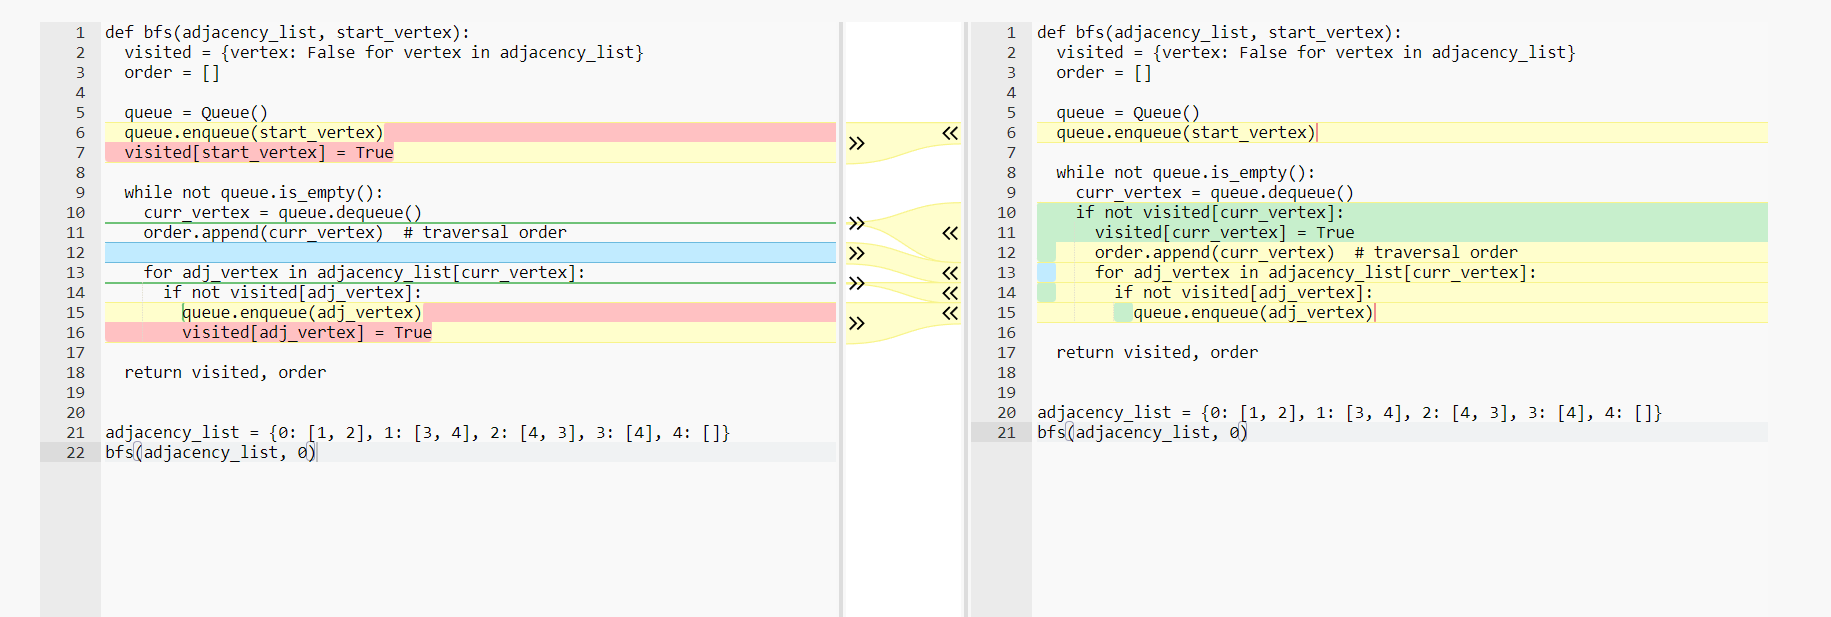

In [3]:
def bfs(adjacency_list, start_vertex):
  pass
  # initialize visited dict = {vertex: False for all vertices}

  # initialize the queue, enqueue the `start_vertex`
  # mark the `start_vertex` as visited

  # while queue is not empty:
  # a. `curr_vertex` <- queue.dequeue()
  # b. for all neighbors of `curr_vertex`:
  #    if neighbor is not visited, enqueue it to queue, mark it visited

  # return visited

In [4]:
def bfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  order = []

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    order.append(curr_vertex)  # traversal order

    for adj_vertex in adjacency_list[curr_vertex]:
      if not visited[adj_vertex]:
        queue.enqueue(adj_vertex)
        visited[adj_vertex] = True

  return visited, order


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 1, 2, 3, 4])

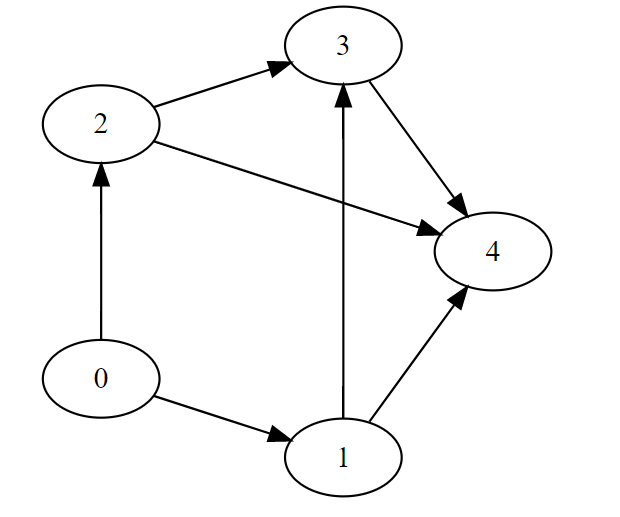

In [5]:
adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs(adjacency_list, 0)

# [0] <- queue (before while loop)
# [] <- traversal (before while loop)

# [1, 2] <- queue
# [0] <- traversal (0)

# [2, 3, 4] <- queue
# [0, 1] <- traversal (1)

# [3, 4] <- queue
# [0, 1, 2] <- traversal (2)

# [4] <- queue
# [0, 1, 2, 3] <- traversal (3)

# [] <- queue
# [0, 1, 2, 3, 4] <- traversal (4)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 1, 2, 3, 4])

In [6]:
def dfs(adjacency_list, start_vertex):
  pass
  # initialize visited dict = {vertex: False for all vertices}

  # initialize the stack, push the `start_vertex`
  # mark the `start_vertex` as visited

  # while stack is not empty:
  # a. `curr_vertex` <- stack.pop()
  # b. for all neighbors of `curr_vertex`:
  #    if neighbor is not visited, push it to stack, mark it visited

  # return visited

In [7]:
def dfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  order = []

  stack = Stack()
  stack.push(start_vertex)
  visited[start_vertex] = True

  while not stack.is_empty():
    curr_vertex = stack.pop()
    order.append(curr_vertex)  # traversal order

    for adj_vertex in adjacency_list[curr_vertex]:
      if not visited[adj_vertex]:
        stack.push(adj_vertex)
        visited[adj_vertex] = True

  return visited, order


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 2, 3, 4, 1])

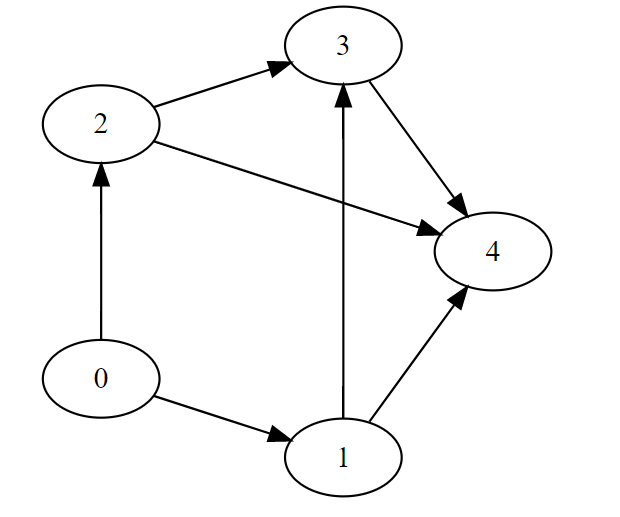

In [8]:
adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs(adjacency_list, 0)

# [0] <- stack (before while loop)
# [] <- traversal (before while loop)

# [1, 2] <- stack
# [0] <- traversal (0)

# [1, 4, 3] <- stack
# [0, 2] <- traversal (2)

# [1, 4] <- stack
# [0, 2, 3] <- traversal (3)

# [1] <- stack
# [0, 2, 3, 4] <- traversal (4)

# [] <- stack
# [0, 2, 3, 4, 1] <- traversal (1)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 2, 3, 4, 1])